# ME:4111 Scientific Computing and Machine Learning

## Midterm Examination (100 points)

### October 12, 2022
### Submit by 9:30am

In [4]:
from IPython.display import Latex
import numpy as np
from matplotlib import pyplot as plt
from numpy import arange, meshgrid, sqrt


# Depending on which methods you choose, you may need to add more packages


## Problem 1 (30 points)

Consider the following equation describing the deflection of a pinned fixed beam subject to a uniform load (see the figure below for reference):

$$ y(x) = - \; \frac{w}{48EI}(2x^4-3Lx^3+L^3x)$$

Let $L = 400 \; cm$, $E = 52,000 \; kN/cm^2$, $I = 32,000 \; cm^4$, $w=4 \; kN/cm$. Note that $x=0 \; cm$ and $y=0 \; cm$ at point $O$ in the figure.

1. Plot the function, y(x), and the derivative, dy(x)/dx. **Be sure to include axis labels!**
2. Find the $x$-location corresponding to the maximum deflection of the beam. Remember from statics that the slope, dy(x)/dx, at the point of maximum deflection is zero.
3. Find the $x$-location corresponding to the maximum deflection of the beam *using a different method than the one used in part 2.* Comment on any differences in performance and/or results.

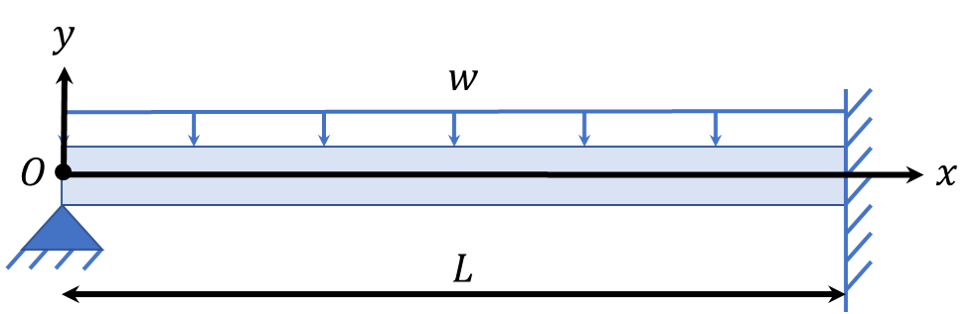

### Problem 1 Part 1 (10 points)

Text(0, 0.5, 'Vertical deflection of the beam in cm')

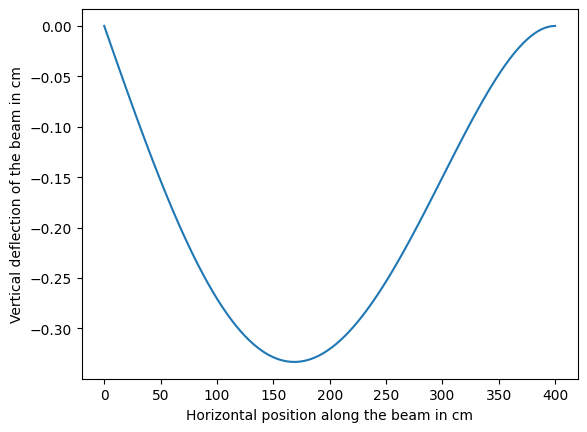

In [44]:
from cProfile import label


L = 400.0 # [cm]
E = 52000.0 # [kN/cm^2]
I = 32000.0 # [cm^4]
w = 4.0 # [kN/cm]

# your code for Problem 1 Part 1 goes here
x = np.linspace(0,400,100)

YFunction =  -1 * (w / (48 * E * I)) * ((2 * (x**4)) - (3 * L * (x**3)) + ((L**3) * x))
YFunctionDyDx =  -1 * (w / (48 * E * I)) * ((8 * (x**3)) - (9 * L * (x**2)) + (L**3))

plt.plot(x, YFunction, label = 'Deflection Function')
plt.legend
plt.xlabel('Horizontal position along the beam in cm')
plt.ylabel('Vertical deflection of the beam in cm')


Text(0, 0.5, 'Derivative of deflection')

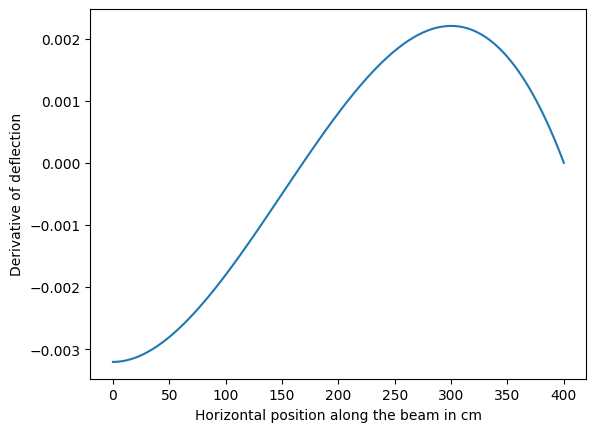

In [6]:
YFunctionDyDx =  -1 * (w / (48 * E * I)) * ((8 * (x**3)) - (9 * L * (x**2)) + (L**3))
plt.plot(x, YFunctionDyDx, label = 'Deflection Derivative')
Zero = 0

plt.xlabel('Horizontal position along the beam in cm')
plt.ylabel('Derivative of deflection')



This needs to be solve for the root on 0 to 400

I'm going to guess the solution is about 150 cm based on the graph

It approaches 0 again near 400 but this is not the point we want

Not only that, I can be pretty certain it is between 100 and 300 cm

### Problem 1 Part 2 (10 points)

In [43]:
# Method used in Part 2: Bisection

# your code for problem 1 part 2 goes here

def YFunctionDyDx(x):
    return -1.0 * (w / (48 * E * I)) * ((8 * (x**3)) - (9 * L * (x**2)) + (L**3))

LowerBound = 100.0
UpperBound = 300.0

xLower = LowerBound
xUpper = UpperBound

xrOld = LowerBound

Tolerance = 10.0**(-1000000)
IterationsMax = 1000

i = 0
while (i < IterationsMax):
    xr = (xLower + xUpper)/2.0
    RelativeError = np.abs(xr - xrOld) / (YFunctionDyDx(UpperBound) - YFunctionDyDx(LowerBound))
    
    if RelativeError < Tolerance:
        strOutput='The solution is {:.4f}'.format(xr)
        break;
    
    if YFunctionDyDx(xLower) * YFunctionDyDx(xr)<0:
        xu = xr
        
    else:
        xLower = xr
        
    xrOld = xr
    
    i += 1

print(strOutput)
print('{:.100f}'.format(RelativeError))
print(YFunctionDyDx(xr))

#not right, issues with error

The solution is 200.0000
0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0.0008012820512820513


### Problem 1 Part 3 (10 points)

In [29]:
# Method used in Part 3:False Position

# your code for problem 1 part 3 goes here

def YFunctionDyDx(x):
    return -1 * (w / (48 * E * I)) * ((8 * (x**3)) - (9 * L * (x**2)) + (L**3))

LowerBound = 100
UpperBound = 300

xLower = LowerBound
xUpper = UpperBound

xrOld = LowerBound

Tolerance = 0.000001
IterationsMax = 1000

i = 0
while (i < IterationsMax):
    xr = xUpper - YFunctionDyDx(xUpper) * (xUpper - xLower) / (YFunctionDyDx(xUpper) - YFunctionDyDx(xLower))
    
    RelativeError = np.abs(xr - xrOld) / (UpperBound - LowerBound)
    
    if RelativeError < Tolerance:
        strOutput='The solution is {:.4f}'.format(xr)
        break;
    
    if YFunctionDyDx(xLower) * YFunctionDyDx(xr)<0:
        xu = xr
        
    else:
        xLower = xr
        
    xrOld = xr
    
    i += 1

print(strOutput)
print(i)
print('{:.100f}'.format(RelativeError))
print(YFunctionDyDx(xr))

# Comment on any differences in performance and/or results here
#
#
#
#

The solution is 190.0000
1
0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0.0005552884615384616


## Problem 2 (30 points)

Let's say an animal's metabolism rate is a function of mass. Consider the following data:

Animal | Mass [kg] | Metabolism Rate [Watts]
:-----|:-----:|:-----: 
Cow|400|270
Tiger|200|160
Human|90|95
Sheep|45|59
Chicken|2|4.8
Pigeon|0.16|0.97

1. Plot the data and identify what trend is present in the data. **Be sure to include axis labels!**
2. Determine the equation for the model describing the relationship between mass and metabolism rate.
3. Predict what the metabolism rate should be for a 150-kg llama. Add the model found in part 2 to the plot generated in part 1 as well as the predicted value.

### Problem 2 Part 1 (10 points)

Text(0, 0.5, 'Metabolic Rate')

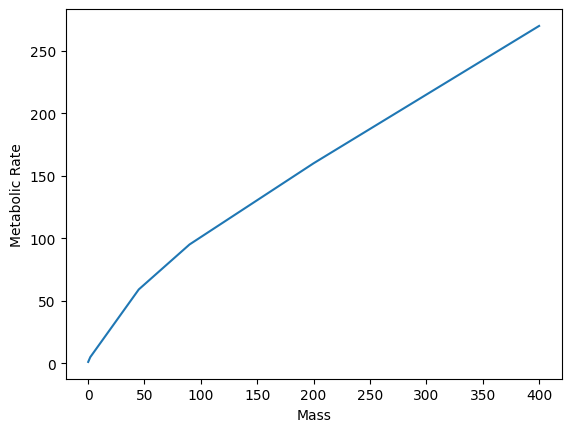

In [9]:
# your code for problem 2 part 1 goes here
Mass = np.array([400, 200, 90, 45, 2, 0.16])
Metabolism = np.array([270, 160, 95, 59, 4.8, 0.97])

plt.plot(Mass, Metabolism)
plt.xlabel('Mass')
plt.ylabel('Metabolic Rate')

The data looks like it is fairly linear, but I could see a reason that it may look somewhat like a square root function

I can surely say the data is of the rough form

$$f(x) = Ax^n + B$$

where A and B are constant and 

$$ \frac{1}{2} <= n <= 1$$



### Problem 2 Part 2 (10 points)

[3.81462446 0.71002607]


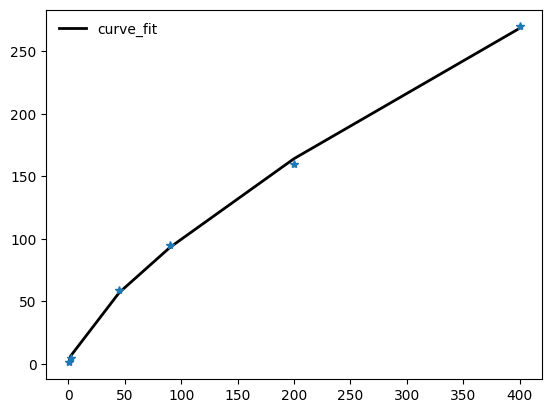

metabolism rate =  function(mass)


In [23]:
# your code for problem 2 part 2 goes here
import scipy

from scipy.optimize import curve_fit

def func(x, a, b):
    return a * Mass**(b)

popt, pcov = curve_fit(func, Mass, Metabolism)
print(popt)
plt.plot(Mass, func(Mass, *popt), 'k-', linewidth =2, label='curve_fit')
plt.plot(Mass,Metabolism,'*')
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.5)
plt.show()


scipy gives us a result in the range which was expected

we can now say
$$MetabolicRate(Mass)=3.81462446x^{0.71002607}$$

In [24]:
# your code for problem 2 part 3 goes here



print('The metabolism rate for a 150-kg llama should be about', 3.81462446*(150**0.71002607),' Watts') # predicted value goes where the '()' is

The metabolism rate for a 150-kg llama should be about 133.8237864718883  Watts


## Problem 3 (40 points)

Consider the following system of equations:

$$  6x_1 - 2x_2 + 2x_3 =  6 $$
$$ -2x_1 + 3x_2 -  x_3 = -4 $$
$$  2x_1 -  x_2 + 5x_3 = -1 $$


1. Determine the solution of the system using a *non-iterative* method. Verify the solution (i.e., plug the solution into the left hand side of the above equations and compare to the right hand side).
2. Determine the solution of the system using an *iterative* method. Verify the solution (i.e., plug the solution into the left hand side of the above equations and compare to the right hand side).
3. Comment on the magnitude of the errors associated with each method and identify why one was more accurate than the other. (Note: The magnitude of the errors is the norm of the differences between the left hand side with your solutions plugged in and right hand side of the equations.)

### Problem 3 Part 1 (15 points)

In [26]:
# Method used in Part 1:Cramer's Rule

# your code for problem 3 part 1 goes here


Solutions = ()

for i in range(0,3):
    Matrix = np.array([ [6, -2, 2],
                        [-2, 3, -1],
                        [2, -1, 5]])

    Vector = np.array([6, -4, -1])
    
    MatrixDeterminant = np.linalg.det(Matrix)
    
    Matrix[:,i] = Vector[:] # Replace column
    Solutions += (np.linalg.det(Matrix)/MatrixDeterminant,)
    

print('\nThe solution is', Solutions ) # solution goes where the '()' is
print('\nThe solution is verified {:.20f}'.format((6*Solutions[0]) + (-2*Solutions[1]) + (2*Solutions[2]) - 6)) # solution plugged into the left hand side of the equations goes where the '()' is



The solution is (0.9333333333333331, -0.9666666666666659, -0.7666666666666662)

The solution is verified -0.00000000000000177636


### Problem 3 Part 2 (15 points)

In [27]:
# Method used in Part 2:Gaussian Elimination

# your code for problem 3 part 2 goes here

def ForwardElimination(A):
    n = A.shape[0]
    for k in range(0, n - 1):
        for i in range (k + 1, n):
            q = - A[i, k] / A[k, k]
            A[i,:] += q * A[k,:]
    return A
#backward substituion
def BackwardSubstitution(A):
    n = A.shape[0]
    x = np.zeros(n)
    x[n - 1] =A[n - 1, n]/A[n - 1, n - 1]
    for i in range (n - 2,- 1, - 1):
        x[i] = (A[i, n] - A[i, i + 1:n]@x[i + 1:n]) / A[i, i]
    return x


# Example 1
print('Example 1')
# define the augmented matrix
AugmentedMatrix = np.array([    [6.0, -2.0, 2.0, 6.0],
                                [-2.0, 3.0, -1.0, -4.0],
                                [2.0, -1.0, 5.0, -1.0]])

AugmentedMatrix = ForwardElimination(AugmentedMatrix)
x = BackwardSubstitution(AugmentedMatrix)

print('the upper triangular matrix is\n',AugmentedMatrix)
print('the solution is', x)

print('\nThe solution is verified {:.1000f}'.format((6*x[0]) + (-2*x[1]) + (2*x[2]) - 6)) # solution plugged into the left hand side of the equations goes where the '()' is


Example 1
the upper triangular matrix is
 [[ 6.00000000e+00 -2.00000000e+00  2.00000000e+00  6.00000000e+00]
 [ 0.00000000e+00  2.33333333e+00 -3.33333333e-01 -2.00000000e+00]
 [ 0.00000000e+00  5.55111512e-17  4.28571429e+00 -3.28571429e+00]]
the solution is [ 0.93333333 -0.96666667 -0.76666667]

The solution is verified 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

### Problem 3 Part 3 (10 points)

taking the solution from part 2 to be exact

In [28]:
# your code for problem 3 part 3 goes here


print('The norm of the error from part 1 is', np.linalg.norm(Solutions - x) ) # the norm of the error goes where the '()' is

print('The norm of the error from part 2 is', 0 ) # the norm of the error goes where the '()' is

The norm of the error from part 1 is 8.08254562088053e-16
The norm of the error from part 2 is 0


In [ ]:
# Comment on the absolute errors and why one method was more accurate

In part 1 a small amount of rounding error is added when the determinant of the altered matrix is divided by the determinant of the matrix

For part 2, the way in which the rows of the matrix were ordered made elimination work very well with no rounding error

